# Binary Classifier Exercise 
## 5 or not 5

We use the stochastic gradient descent classifer and the random forest to classify handwritten 5's

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [26]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST Original')
X,y = mnist['data'], mnist['target']
some_digit = X[36000]


(-0.5, 27.5, 27.5, -0.5)

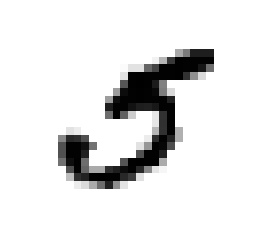

In [28]:
plt.imshow(some_digit.reshape(28, 28), cmap='binary')
plt.axis('off')

In [5]:
# we split the into two 60000 for train and 10000 for test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
# then we shuffle everything
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[shuffle]

In [7]:
# we're only classifying 5's so let's convert our digit array to boolean's
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

X_train.shape, y_train_5.shape

((60000, 784), (60000,))

In [8]:
# we setupt a stochastic gradient descent classifier because it is efficient with large datasets
# we set the random_state to 42 to ensure we get the same result everytime

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
# we can use it to predict a single digit
sgd_clf.predict([X[3600]])

array([False], dtype=bool)

In [10]:
# we use this function for cross validation using our train set by K-folds (3)
# we then make predictions and evaluate predictions on each of these
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.83363327,  0.8699935 ,  0.87443116])

In [11]:
# this does the same as the above but instead of returning a score it returns the prediction for each sample
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [12]:
# THE CONFUSION MATRIX
# Row represents actual class while colomn represents predicted class
# the first row represents non-5 images
# the second row represents 5 images
#
# [ true negatives, false negatives ],
# [ false positives, true positives ] 
#

from sklearn.metrics import confusion_matrix
confu_mat = confusion_matrix(y_train_5, y_train_pred)

array([[53713,   866],
       [ 1477,  3944]], dtype=int64)

In [15]:
precision = confu_mat[1][1] / (confu_mat[1][1] + confu_mat[1][0])
recall = confu_mat[1][1] / (confu_mat[1][1] + confu_mat[0][1])
precision, recall

(0.72754104408780673, 0.81995841995842)

In [17]:
# this does the same as the above ;) - computer precision and recall

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.72754104408780673

In [18]:
F1 = confu_mat[1][1] / (confu_mat[1][1] + (( confu_mat[0][1] + confu_mat[1][0] ) / 2 ) )
F1

0.77099012804222466

In [19]:
# same as the above - computes the famous f1 score 
# it's all about striking the right precision/recall tradeoff

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.77099012804222466

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [33]:
# in order to tweak the precision/recall tradeoff we must have access to the prediction scores

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([[      0.        , -104580.5735775 ],
       [      0.        , -409381.09497312],
       [      0.        , -654376.24420271],
       ..., 
       [      0.        , -911244.8442895 ],
       [      0.        , -272864.75284627],
       [      0.        , -227141.68954745]])

In [50]:
y_scores.shape

(60000, 2)

(-700000, 700000)

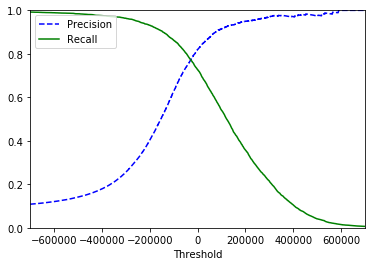

In [63]:
# we plot the precision/recall tradeoff

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores[:,1])

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.xlim([-700000,700000])

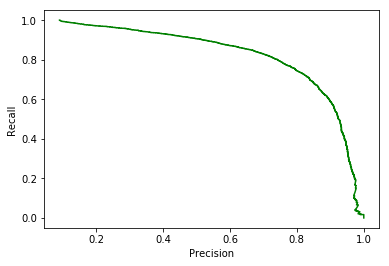

In [69]:
# another way to choose the threshold

plt.plot(precisions[:-1], recalls[:-1], "g-", label="Recall")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [101]:
# for example we want a 90%  precision precision so we set the threshold to 80000 (first graph)

y_train_pred_90 = (y_scores > 80000)

precision_score(y_train_5, y_train_pred_90[:,1]), recall_score(y_train_5_, y_train_pred_90[:,1])

(0.90472078295912495, 0.57978232798376683)

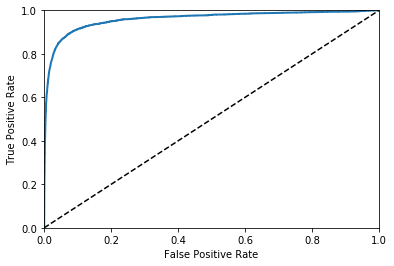

In [109]:
# THE ROC - Receiver Operating Characteristic
# plots the true positive rate against the false positive
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores[:,1])

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [110]:
# this computes the area under the curve above, perferct would be 1, random would be 0.5

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores[:,1])

0.96005646805760836

In [111]:
# we compare out SGD  classifier with the Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [112]:
# in order to plot them we need scores and not probabilities.
# we use the positive class probability as the score

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

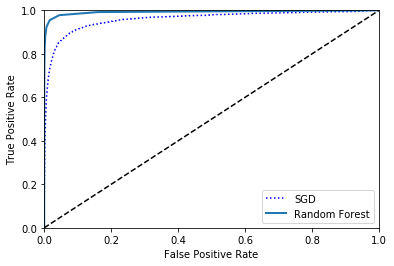

In [114]:
plt.plot(fpr, tpr, "b:", label="SGD")

plt.plot(fpr_forest, tpr_forest, linewidth=2, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right')



In [115]:
roc_auc_score(y_train_5, y_scores_forest)

0.99239046707912704